<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%EC%8B%A4%EC%8A%B5(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ◆ 불균형 데이터 처리
### 1. 필요 라이브러리 import
#### - imbalanced-learn 패키지
#### - imbalanced data 문제를 해결하기 위한 다양한 샘플링 방법을 구현한 파이썬 패키지
#### - 설치 방법 : jupyter notebook에서 '!pip install imbalanced-learn' 혹은 '!pip install imbalanced'

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)          # FutureWarning 제거
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification                        # 데이터셋 생성 패키지

# 불균형 데이터 처리-언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection

# 불균형 데이터 처리-오버 샘플링
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 검증
from sklearn.ensemble import RandomForestClassifier                     # 랜덤 포레스트
from sklearn.model_selection import RepeatedStratifiedKFold             # Cross-Validation
from sklearn.model_selection import cross_validate                      # Cross-Validation

In [3]:
# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :                    # Windows OS
    font_family = "Malgun Gothic"
else:                                   # MAC OS
    font_family = "AppleGothic"

# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc={"axes.unicode_minus" : False})

# 불균형 데이터에 처리에 따른 랜덤포레스트 결과 확인 함수 생성
def Randomforest_Result(x, y, title):
    rf = RandomForestClassifier(criterion='entropy')
    cv_rf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#   cv_rf = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
    scores = cross_validate(rf, x, y, scoring='f1', cv=cv_rf, n_jobs=1)
    print(title, ':', '3-Fold CV f1 score: %.4f' % np.mean(scores['test_score']))

    return

### 2. Under Sampling
### 1) 데이터셋 준비 및 확인

In [4]:
 # 데이터셋 준비
 X_data, y_class = make_classification(n_classes=2, class_sep=2, n_samples=10000, n_features=20, weights=[0.9, 0.1], flip_y=0, n_clusters_per_class=1, random_state=10)

 print(X_data.shape)
 y_class.shape

(10000, 20)


(10000,)

In [9]:
# count_and_plot 그리기 함수
from collections import Counter
from matplotlib import pyplot
def count_and_plot(y):
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
        pyplot.bar(counter.keys(), counter.values())
        pyplot.show()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


Class=0, n=9000 (90.000%)


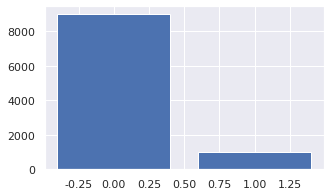

Class=1, n=1000 (10.000%)


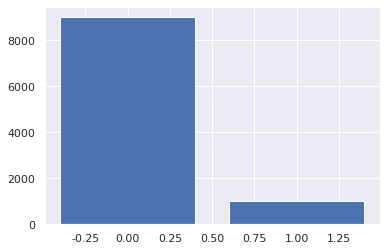

In [10]:
# 데이터셋 가시화
plt.figure(figsize=(5, 3))
count_and_plot(y_class)

In [11]:
Randomforest_Result(X_data, y_class, "언더 샘플링_원본 데이터 결과")

언더 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9882


### 2) Random Under Sampling

In [12]:
# sampling_strategy
# - 'majority' (소수 집단과 동일하게 샘플링)
# - 0과 1 사이의 숫자를 지정(소수 집단 데이터수 / 다수 집단 데이터수)하여 샘플링
under_random = RandomUnderSampler(sampling_strategy = 'majority')
X_random, y_random = under_random.fit_resample(X_data, y_class)

Class=0, n=1000 (50.000%)


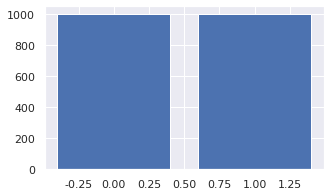

Class=1, n=1000 (50.000%)


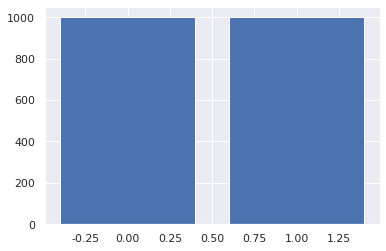

In [13]:
plt.figure(figsize=(5, 3))
count_and_plot(y_random)

In [14]:
Randomforest_Result(X_random, y_random, "언더 샘플링_램던언더 샘플링_데이터 결과")

언더 샘플링_램던언더 샘플링_데이터 결과 : 3-Fold CV f1 score: 0.9957


In [15]:
# sampling_strategy
# 0과 1 사이의 숫자를 지정(소수 집단 데이터수 / 다수 집단 데이터수)하여 샘플링
under_random_05 = RandomUnderSampler(sampling_strategy = 0.5)
X_random_05, y_random_05 = under_random_05.fit_resample(X_data, y_class)

Class=0, n=2000 (66.667%)


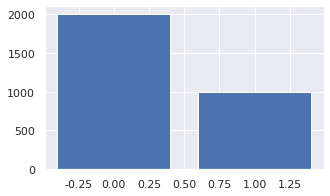

Class=1, n=1000 (33.333%)


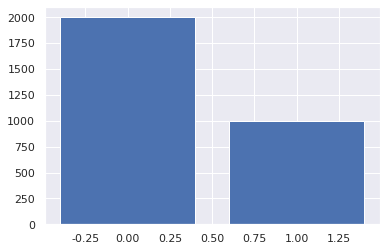

In [16]:
plt.figure(figsize=(5, 3))
count_and_plot(y_random_05)

In [17]:
Randomforest_Result(X_random_05, y_random_05, "언더 샘플링_랜덤언더 샘플링_비율:0.5_데이터 결과")

언더 샘플링_랜덤언더 샘플링_비율:0.5_데이터 결과 : 3-Fold CV f1 score: 0.9926


### 3) TomekLinks

In [18]:
# 토멕링크
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_data, y_class)

Class=0, n=8993 (89.993%)


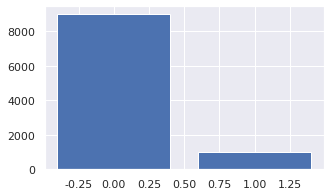

Class=1, n=1000 (10.007%)


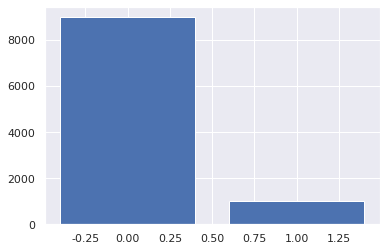

In [20]:
plt.figure(figsize=(5, 3))
count_and_plot(y_tl)

In [21]:
Randomforest_Result(X_tl, y_tl, "언더 샘플링_토멕링크_데이터 결과")

언더 샘플링_토멕링크_데이터 결과 : 3-Fold CV f1 score: 0.9894


### 4) OSS(OneSidedSelection)

In [22]:
# OSS(OneSidedSelection)
oss = OneSidedSelection(random_state=42)
X_oss, y_oss = oss.fit_resample(X_data, y_class)

Class=0, n=7666 (88.461%)


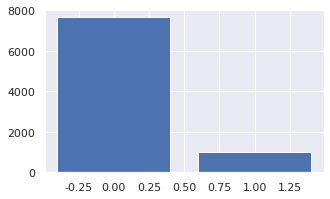

Class=1, n=1000 (11.539%)


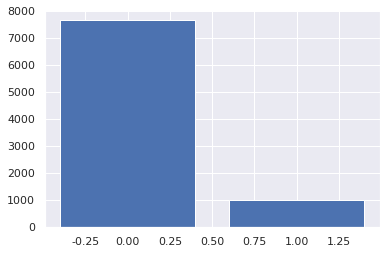

In [23]:
plt.figure(figsize=(5, 3))
count_and_plot(y_oss)

In [24]:
Randomforest_Result(X_oss, y_oss, "언더 샘플링_OSS_데이터 결과")

언더 샘플링_OSS_데이터 결과 : 3-Fold CV f1 score: 0.9891


### 3. Oversampling
### 1) 데이터셋 준비 및 확인

(10000, 20)
Class=0, n=9000 (90.000%)


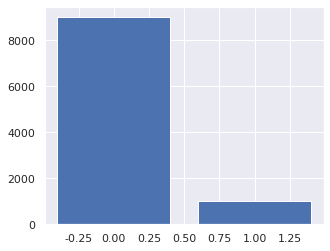

Class=1, n=1000 (10.000%)


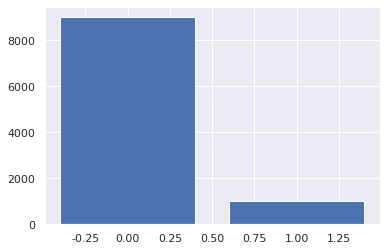

In [25]:
# 데이터셋 준비 및 확인
X_data, y_class = make_classification(n_classes=2, class_sep=2, n_samples=10000, n_features=20, weights=[0.9, 0.1], flip_y=0, n_clusters_per_class=1, random_state=10)

print(X_data.shape)
y_class.shape

plt.figure(figsize=(5, 4))
count_and_plot(y_class)

In [26]:
Randomforest_Result(X_data, y_class, "오버 샘플링_원본 데이터 결과")

오버 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9887


### 2) Random over sampling

In [28]:
# 랜덤오버샘플링
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)


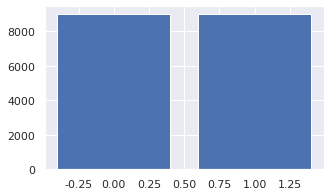

Class=1, n=9000 (50.000%)


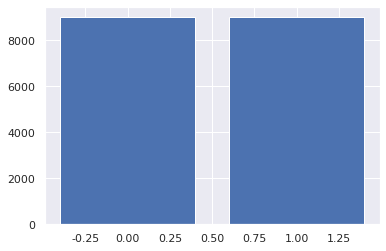

In [29]:
plt.figure(figsize=(5, 3))
count_and_plot(y_ros)

In [30]:
Randomforest_Result(X_data, y_class, "오버 샘플링_랜덤오버샘플링 결과")

오버 샘플링_랜덤오버샘플링 결과 : 3-Fold CV f1 score: 0.9889


### 3) SMOTE

In [31]:
# SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)


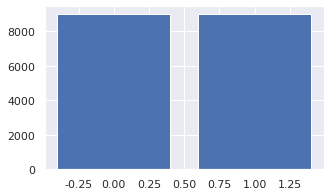

Class=1, n=9000 (50.000%)


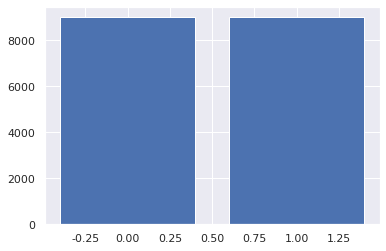

In [32]:
plt.figure(figsize=(5, 3))
count_and_plot(y_sm)

In [33]:
Randomforest_Result(X_sm, y_sm, "오버 샘플링_SMOTE 결과")

오버 샘플링_SMOTE 결과 : 3-Fold CV f1 score: 0.9984


### 4) ADASYN

In [34]:
# ADASYN
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_data, y_class)

Class=0, n=9000 (49.972%)


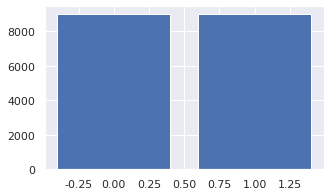

Class=1, n=9010 (50.028%)


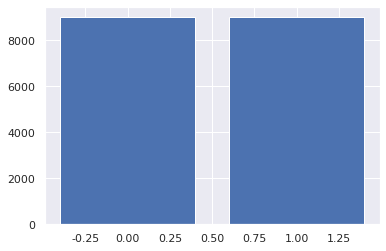

In [35]:
plt.figure(figsize=(5, 3))
count_and_plot(y_ada)

In [36]:
Randomforest_Result(X_ada, y_ada, "오버 샘플링_ADASYN 결과")

오버 샘플링_ADASYN 결과 : 3-Fold CV f1 score: 0.9987


### 5) Boderline SMOTE

In [37]:
# Boderline SMOTE
bor_sm = BorderlineSMOTE(random_state=42)
X_bor_sm, y_bor_sm = bor_sm.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)


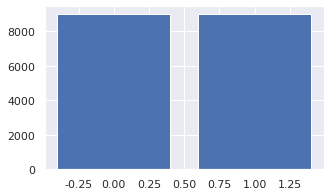

Class=1, n=9000 (50.000%)


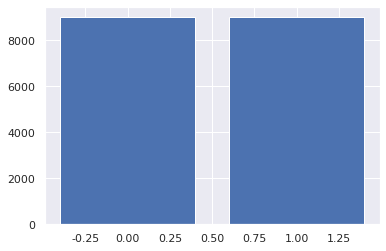

In [38]:
plt.figure(figsize=(5, 3))
count_and_plot(y_bor_sm)

In [39]:
Randomforest_Result(X_bor_sm, y_bor_sm, "오버 샘플링_Boderline SMOTE 결과")

오버 샘플링_Boderline SMOTE 결과 : 3-Fold CV f1 score: 0.9987
